# NLP: from LSTM to Tranformers

In this notebook we will experiment NLP from LSTM to LLM

## A Simple tranformer

The Transformer architecture has become a cornerstone in the field of Natural Language Processing (NLP), powering most of the recent advancements, including Large Language Models (LLMs) like GPT. Let's break down the Transformer method step by step to understand how it works and why it's so effective.

1. Background and Core Idea
Transformers, introduced in the paper "Attention Is All You Need" by Vaswani et al., revolutionized NLP by focusing entirely on attention mechanisms, moving away from the recurrent layers used in previous models. The core idea is to enable the model to focus on different parts of the input sequence when predicting each part of the output sequence, making it highly efficient for learning long-range dependencies.

2. Architecture Overview
The Transformer model consists of two main parts: the Encoder and the Decoder.  

  - Encoder: It processes the input sequence and encapsulates the information into a set of vectors (one for each input token). The encoder is composed of a stack of identical layers, each with two sub-layers: a multi-head self-attention mechanism and a fully connected feed-forward network.

  - Decoder: It generates the output sequence, token by token, using the encoded information. Like the encoder, the decoder is also made up of a stack of identical layers. However, each layer in the decoder has three sub-layers: a multi-head self-attention mechanism, a multi-head attention mechanism over the encoder's output, and a fully connected feed-forward network.

3. Attention Mechanism
The key innovation in Transformers is the attention mechanism, particularly the self-attention mechanism, which allows the model to weigh the importance of different words in the input data relative to each other.

  - Self-Attention: This mechanism helps the model to look at other positions in the input sequence for understanding a word in a better way.

  - Multi-Head Attention: This consists of multiple attention layers running in parallel, allowing the model to focus on different positions, which enriches its understanding and processing of the sequence.

4. Positional Encoding
Since Transformers do not inherently process sequence order (unlike RNNs or LSTMs), positional encoding is added to the input embeddings to give the model some information about the order of words in the sentence.

5. Training and Optimization
Transformers are trained using backpropagation, similar to other deep learning models. They often require significant computing resources, especially for large models intended for general-purpose language understanding.

6. Implementation with Python
The Hugging Face's Transformers library is a popular choice for implementing Transformer models in Python. It provides pre-trained models that can be used for a wide range of NLP tasks, as well as tools to train your own models.

Here's a simple example to get started with the Transformers library:

In [1]:
from transformers import pipeline

# Load a pre-trained model and tokenizer
generator = pipeline('text-generation', model='gpt2')

# Generate text
input_text = "Transformers are"
generated_text = generator(input_text, max_length=30, num_return_sequences=1)

print(generated_text[0]['generated_text'])


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(
Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Transformers are generally used interchangeably.

Locations [ edit ]

A good starting point is the Moon (also known as Cinn


This code loads the GPT-2 model, a type of Transformer, and generates text based on a given prompt.

## Before LLM

Before the advent of Transformer models, Natural Language Processing (NLP) heavily relied on sequential neural networks, particularly Recurrent Neural Networks (RNNs) and their more advanced variant, Long Short-Term Memory networks (LSTMs), for tasks that involve understanding and generating language. These models are designed to process sequences of data, such as sentences, making them suitable for NLP tasks. Here's a bit more detail on how they were used:

RNNs are a type of neural network designed for processing sequential data. They are called "recurrent" because they perform the same task for every element of a sequence, with the output being dependent on the previous computations. This recurrence enables them to maintain information in 'memory' over time, making them suitable for tasks where context is important, like language modeling.

In NLP, RNNs were used for a variety of tasks such as:

- Language Modeling: Predicting the next word in a sentence based on the previous words.
- Text Generation: Generating new text sequences after learning from a corpus.
Machine Translation: Translating text from one language to another.
- Sentiment Analysis: Determining the sentiment expressed in a piece of text.

LSTMs are a special kind of RNN capable of learning long-term dependencies. They were introduced to overcome the limitations of traditional RNNs, particularly issues related to learning long-range dependencies due to problems like vanishing gradients. LSTMs have a complex architecture with a memory cell and multiple gates (input, output, and forget gates) that regulate the flow of information.

They improved the performance of NLP systems significantly by being better at capturing context over longer sequences, making them highly effective for:

- Text Classification: Classifying texts into predefined categories.
- Speech Recognition: Transcribing spoken language into text.
- Named Entity Recognition (NER): Identifying and classifying key information (names, places, etc.) in text.

While RNNs and LSTMs were a significant advancement, they had limitations, especially regarding parallelization and dealing with very long sequences, due to their sequential nature. Transformers were introduced as a solution to these limitations, providing a mechanism (attention) that allows for better handling of long-range dependencies and significantly faster training times thanks to their non-sequential processing capabilities.

Transformers and models based on them, like BERT and GPT, have since dominated NLP, pushing the boundaries of what's possible in tasks like language understanding, text generation, and beyond.

let's walk through the process of building a simple LSTM model for predicting the next word in a sentence using TensorFlow and Keras. This example will include word embedding as the first layer of our model, which is crucial for handling text data in neural networks.

In [2]:
# Example text corpus
text = """Long ago, the mice had a general council to consider what measures they could take to outwit their common enemy, the Cat. Some said this, and some said that but at last a young mouse got up and said he had a proposal to make, which he thought would meet the case. He said that the Cat was very cunning by nature and that they needed to be united and clever to defeat her."""


- `Tokenizer()` creates an instance of the Tokenizer class, which is used to vectorize a text corpus by turning each text into a sequence of integers.
- `tokenizer.fit_on_texts([text])` updates the internal vocabulary based on the list of texts. This prepares the tokenizer for use.
- `texts_to_sequences` converts the text to a sequence of integers, where each integer represents a specific word in a dictionary created by the Tokenizer.
- `vocab_size` is determined by the number of unique words in the text plus one. The `+1` is necessary because index 0 is reserved and not assigned to any word.


In [3]:
from tensorflow.keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer()
tokenizer.fit_on_texts([text])

sequence_data = tokenizer.texts_to_sequences([text])[0]

vocab_size = len(tokenizer.word_index) + 1
print(tokenizer.word_index)
print(sequence_data)
print(vocab_size)

{'to': 1, 'the': 2, 'said': 3, 'and': 4, 'a': 5, 'that': 6, 'he': 7, 'had': 8, 'they': 9, 'cat': 10, 'some': 11, 'long': 12, 'ago': 13, 'mice': 14, 'general': 15, 'council': 16, 'consider': 17, 'what': 18, 'measures': 19, 'could': 20, 'take': 21, 'outwit': 22, 'their': 23, 'common': 24, 'enemy': 25, 'this': 26, 'but': 27, 'at': 28, 'last': 29, 'young': 30, 'mouse': 31, 'got': 32, 'up': 33, 'proposal': 34, 'make': 35, 'which': 36, 'thought': 37, 'would': 38, 'meet': 39, 'case': 40, 'was': 41, 'very': 42, 'cunning': 43, 'by': 44, 'nature': 45, 'needed': 46, 'be': 47, 'united': 48, 'clever': 49, 'defeat': 50, 'her': 51}
[12, 13, 2, 14, 8, 5, 15, 16, 1, 17, 18, 19, 9, 20, 21, 1, 22, 23, 24, 25, 2, 10, 11, 3, 26, 4, 11, 3, 6, 27, 28, 29, 5, 30, 31, 32, 33, 4, 3, 7, 8, 5, 34, 1, 35, 36, 7, 37, 38, 39, 2, 40, 7, 3, 6, 2, 10, 41, 42, 43, 44, 45, 4, 6, 9, 46, 1, 47, 48, 4, 49, 1, 50, 51]
52


Each unique word in the text is mapped to a unique integer. The sequence of integers reflects the order of words in the original text, where each number represents a specific word.

The sequence [12, 13, 2, 14, ...] shows the integer representation of each word in your text. The length of this sequence, 52 in this case, indicates the total number of tokens (words) present in your input text after tokenization.

Each unique word is assigned a unique integer based on its frequency in the text. The most frequent word gets the integer 1, the next most frequent word gets the integer 2, and so on. The index 0 is reserved and not used for any word.

The numbers assigned to each word, such as "Long" being 12 and "ago" being 13, are determined by the internal mechanisms of the Tokenizer class in Keras. These numbers are not fixed and can vary depending on several factors in your text data and the tokenizer's configuration. Here's a closer look at how these numbers are typically determined:

The Tokenizer often assigns integers to words based on their frequency in the text, with the most frequent word assigned the integer 1, the next most frequent word assigned the integer 2, and so on. However, the actual mapping can also be influenced by the order in which words are encountered and other tokenizer settings.

If "Long" is assigned 12 and "ago" 13, it suggests that in the construction of the tokenizer's word index, "Long" and "ago" were assigned these numbers based on their position in the frequency count or their order of appearance in the text.

The next step is a loop that creates sequences of tokens. For each iteration, it takes a slice of the sequence_data, creating a pair where the first element is considered as input (X) and the second as the label (y).
np.array(sequences) converts the list of sequences into a NumPy array for easier manipulation and to meet the input requirements of Keras models.
X, y = sequences[:,0], sequences[:,1] splits the sequences into inputs and labels.

In [4]:
import numpy as np

sequences = []
for i in range(1, len(sequence_data)):
    words_sequence = sequence_data[i-1:i+1]
    sequences.append(words_sequence)

sequences = np.array(sequences)
X, y = sequences[:,0],sequences[:,1]
print(sequences)
print(X, y)

[[12 13]
 [13  2]
 [ 2 14]
 [14  8]
 [ 8  5]
 [ 5 15]
 [15 16]
 [16  1]
 [ 1 17]
 [17 18]
 [18 19]
 [19  9]
 [ 9 20]
 [20 21]
 [21  1]
 [ 1 22]
 [22 23]
 [23 24]
 [24 25]
 [25  2]
 [ 2 10]
 [10 11]
 [11  3]
 [ 3 26]
 [26  4]
 [ 4 11]
 [11  3]
 [ 3  6]
 [ 6 27]
 [27 28]
 [28 29]
 [29  5]
 [ 5 30]
 [30 31]
 [31 32]
 [32 33]
 [33  4]
 [ 4  3]
 [ 3  7]
 [ 7  8]
 [ 8  5]
 [ 5 34]
 [34  1]
 [ 1 35]
 [35 36]
 [36  7]
 [ 7 37]
 [37 38]
 [38 39]
 [39  2]
 [ 2 40]
 [40  7]
 [ 7  3]
 [ 3  6]
 [ 6  2]
 [ 2 10]
 [10 41]
 [41 42]
 [42 43]
 [43 44]
 [44 45]
 [45  4]
 [ 4  6]
 [ 6  9]
 [ 9 46]
 [46  1]
 [ 1 47]
 [47 48]
 [48  4]
 [ 4 49]
 [49  1]
 [ 1 50]
 [50 51]]
[12 13  2 14  8  5 15 16  1 17 18 19  9 20 21  1 22 23 24 25  2 10 11  3
 26  4 11  3  6 27 28 29  5 30 31 32 33  4  3  7  8  5 34  1 35 36  7 37
 38 39  2 40  7  3  6  2 10 41 42 43 44 45  4  6  9 46  1 47 48  4 49  1
 50] [13  2 14  8  5 15 16  1 17 18 19  9 20 21  1 22 23 24 25  2 10 11  3 26
  4 11  3  6 27 28 29  5 30 31 32 33  4  3  7

In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.utils import to_categorical

y = to_categorical(y, num_classes=vocab_size)

model = Sequential()
model.add(Embedding(vocab_size, 10, input_length=1))
model.add(LSTM(100))
model.add(Dense(vocab_size, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


- `to_categorical` converts the class vector (integers) to binary class matrix. This is needed for categorical crossentropy loss.
- `Sequential()` creates a linear stack of layers in the model.
- `Embedding` layer is used to create word embeddings. It takes the vocabulary size, the size of the embedding dimension, and the length of input sequences as parameters.
- `LSTM` layer is added with 100 units. It's a type of RNN that can capture long-term dependencies.
- `Dense layer` is a fully connected layer that outputs probabilities over the vocabulary, hence its size is vocab_size, with a softmax activation function.
- `compile` prepares the model for training, defining the loss function, optimizer, and metrics.

In [6]:
model.fit(X, y, epochs=200, verbose=0)


In [7]:
import numpy as np

def generate_text(seed_text, next_words=1):
    for _ in range(next_words):
        token_list = tokenizer.texts_to_sequences([seed_text])[0]
        token_list = np.array(token_list).reshape(1, -1)  # Reshape for prediction
        predictions = model.predict(token_list, verbose=0)
        predicted = np.argmax(predictions, axis=-1)[0]  # Get the index of the max probability

        output_word = ""
        for word, index in tokenizer.word_index.items():
            if index == predicted:
                output_word = word
                break
        seed_text += " " + output_word
    return seed_text



In [8]:
seed_text = "The cat"
next_words = 3
print(generate_text(seed_text, next_words))


The cat to got up


In [9]:
file_path = "/content/The_Last_Lightkeeper_Expanded_Story.txt"

with open(file_path, 'r') as file:
    story_content = file.read()

print(story_content)



Once upon a time, in a small coastal town nestled between the roaring sea and the ancient cliffs, there lived a lightkeeper named Eli. Eli was the guardian of the lighthouse, a towering beacon that had stood for centuries, guiding sailors safely to shore through treacherous waters.

Eli had taken over the duties of lightkeeping from his father, who had received the mantle from his forefathers. The lightkeeping tradition ran deep in Eli's family, back to times when the world was a much larger and more mysterious place. The lighthouse was not just a job for Eli; it was his life. He cared for it as one would care for a family member, ensuring that the light never faltered, for the safety of those at sea depended on it.

The townfolk respected Eli for his dedication. However, times were changing. New technologies were emerging, making old ways obsolete. The town council decided that the lighthouse would be automated, deeming a human lightkeeper unnecessary. Eli was devastated. The lightho

## Predicting the next sentence

We can adapt an LSTM model to predict the next sentence, but this requires a slightly different approach compared to predicting just the next word. Predicting the next sentence involves generating a sequence of words that form a coherent sentence, based on the context provided by a preceding sentence or sequence of text. Here’s how you might approach this:

1. Data Preparation: For sentence prediction, your dataset should ideally be structured so that each input sequence (X) is a sentence, and the corresponding target (y) is the next sentence. This involves:

  - Tokenizing the text at the sentence level to create pairs of consecutive sentences.
  - Further tokenizing each sentence into words, then converting these into sequences of integers using a tokenizer.
2. Sequence Padding: Ensure that all input sequences are padded to have the same length for training the LSTM model. This may involve padding each sentence to the length of the longest sentence in your dataset.

3. Model Architecture: The model architecture might be similar to the one used for next-word prediction, but with adjustments to handle the complexity of generating full sentences. You could use:

  - An Embedding layer for word representations.
  - One or more LSTM layers to learn from the sequence data.
  - A Dense layer with a softmax activation, outputting probabilities across the vocabulary for each potential next word in the sequence.

4. Training
Train the model on your prepared dataset. The model learns to predict the sequence of words that form the next sentence based on the input sentence.

5. Generating Sentences:
  - Start with an input sentence, tokenize it, pad it, and feed it into your trained model.
  - The model predicts the next word. Append this word to your input sequence and use it as the new input to predict the following word.
  - Continue this process until the model generates a sentence terminator (like a period, question mark, or a custom end-of-sentence token), or until you reach a predetermined sentence length.

We can certainly use our own about 1000-word long text to train the model. The process for training the model would remain essentially the same as described previously, but using a longer text can significantly improve the model's understanding of language patterns, potentially leading to better text generation outcomes.



In [10]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np

# Initialize the Tokenizer
tokenizer = Tokenizer()

# Fit the tokenizer on the text
tokenizer.fit_on_texts([story_content])

# Convert text to a sequence of integers
sequence_data = tokenizer.texts_to_sequences([story_content])[0]

# Vocabulary size (adding 1 because indexing of sequences starts with 1 not 0)
vocab_size = len(tokenizer.word_index) + 1

# Create sequences for each sentence
input_sequences = []
for i in range(1, len(sequence_data)):
    n_gram_sequence = sequence_data[:i+1]
    input_sequences.append(n_gram_sequence)

# Pad sequences to make them the same length
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

# Split data into input (X) and output (y) parts
X = input_sequences[:,:-1]
y = input_sequences[:,-1]

# Convert output to categorical
y = to_categorical(y, num_classes=vocab_size)

print("Preprocessing Complete. X and y are ready for training.")



Preprocessing Complete. X and y are ready for training.


- Tokenizer: This part of the code initializes a tokenizer that is then fitted to the text. The tokenizer creates a mapping from each unique word to a unique integer.
- Sequence Data: The text is converted into a sequence of integers, where each integer represents a unique word as identified by the tokenizer.
- Vocabulary Size: It's calculated by taking the size of the word index (the total number of unique words) and adding one. The extra one accounts for potential zero-padding in sequences.
- Creating N-gram Sequences: For each position in the sequence of text, a new sequence (n-gram) is created that ends at that position. This helps the model learn the context leading up to each word.
- Padding: Sequences are padded to ensure they have the same length, which is necessary for training the model.
- Splitting Data: The sequences are split into inputs (X) and outputs (y). Inputs are the sequences without the last word, and outputs are just the last word of each sequence.
- One-hot Encoding: The output labels (y) are converted into a one-hot encoded format to match the categorical cross-entropy expectation of the model during training.

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.optimizers import Adam

# Assuming 'max_sequence_len' and 'vocab_size' are already defined based on your dataset

model = Sequential()
# Add an Embedding layer expecting input vocab of size 'vocab_size', and output embedding dimension of 100
model.add(Embedding(input_dim=vocab_size, output_dim=100, input_length=max_sequence_len-1))

# Add an LSTM layer with 100 memory units
model.add(LSTM(100))

# Add a Dense layer with 'vocab_size' outputs and softmax activation to predict the probability distribution of the next word
model.add(Dense(vocab_size, activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.01), metrics=['accuracy'])

# Print the model summary
model.summary()



Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 1153, 100)         44400     
                                                                 
 lstm_1 (LSTM)               (None, 100)               80400     
                                                                 
 dense_1 (Dense)             (None, 444)               44844     
                                                                 
Total params: 169644 (662.67 KB)
Trainable params: 169644 (662.67 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


- Embedding Layer: The first layer is the Embedding layer, which will learn the embeddings for all the words in the training dataset. The output_dim parameter is set to 100, meaning each word will be represented by a 100-dimensional vector. The input_length is set to max_sequence_len - 1 because the last element of each sequence is used as the label (the next word to predict).
- LSTM Layer: This layer has 100 units (or neurons). LSTM layers are powerful for sequence prediction problems because they can maintain long-term dependencies. You can experiment with the number of units or add more LSTM layers for more complex sequences.
- Dense Layer: The final layer is a fully connected (Dense) layer with a softmax activation function. It outputs a probability distribution over the vocabulary for the next word. The number of units in this layer matches the size of the vocabulary (vocab_size).
- Compilation: The model is compiled with the Adam optimizer and categorical crossentropy as the loss function, which is standard for multi-class classification tasks like this. The learning rate (lr) is set to 0.01, but you may need to adjust this based on your dataset.

This model architecture is a good starting point for next-word prediction tasks. We can further customize and experiment with it by adding dropout layers to reduce overfitting, increasing the number of LSTM layers, or adjusting the number of units in the LSTM and Dense layers based on the complexity of our dataset and the performance requirements of our application.

In [12]:
# Train the model

history = model.fit(X, y, epochs=100, batch_size=256, verbose=0, validation_split=0.2)

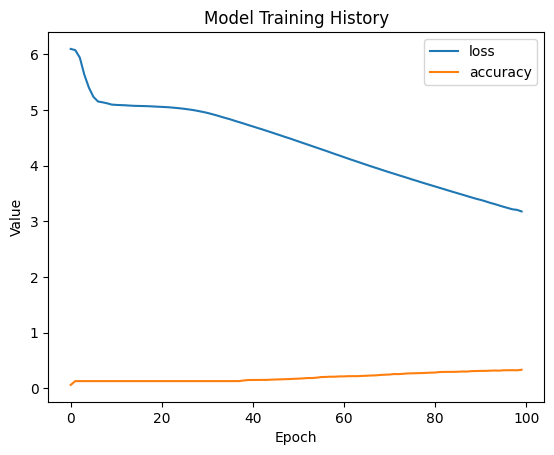

In [13]:
import matplotlib.pyplot as plt

# Plot the training loss and accuracy
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['accuracy'], label='accuracy')
plt.title('Model Training History')
plt.ylabel('Value')
plt.xlabel('Epoch')
plt.legend()
plt.show()



In [14]:
def generate_text(seed_text, next_words, model, max_sequence_len, tokenizer):
    for _ in range(next_words):
        token_list = tokenizer.texts_to_sequences([seed_text])[0]
        token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
        predicted = np.argmax(model.predict(token_list, verbose=0), axis=-1)

        output_word = ""
        for word, index in tokenizer.word_index.items():
            if index == predicted:
                output_word = word
                break
        seed_text += " " + output_word
    return seed_text


In [15]:
seed_text = "Today is a beautiful"
next_words = 10

print(generate_text(seed_text, next_words, model, max_sequence_len, tokenizer))


Today is a beautiful lighthouse and the lighthouse and the lighthouse was a lighthouse


Final Training Accuracy: 33.62%


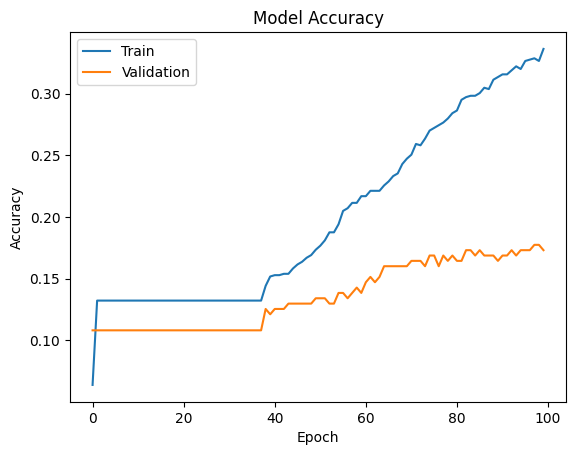

In [16]:
# Check if 'accuracy' is in the history object (this might differ based on the Keras/TF version, could also be 'acc')
accuracy_key = 'accuracy' if 'accuracy' in history.history else 'acc'

# Print the accuracy of the last epoch
print(f"Final Training Accuracy: {history.history[accuracy_key][-1] * 100:.2f}%")

# Plot training & validation accuracy values
plt.plot(history.history[accuracy_key])
if 'val_accuracy' in history.history or 'val_acc' in history.history:
    val_accuracy_key = 'val_accuracy' if 'val_accuracy' in history.history else 'val_acc'
    plt.plot(history.history[val_accuracy_key])
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
else:
    plt.title('Training Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train'], loc='upper left')
plt.show()